In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


Time taken with omega=3: 360.7071 seconds


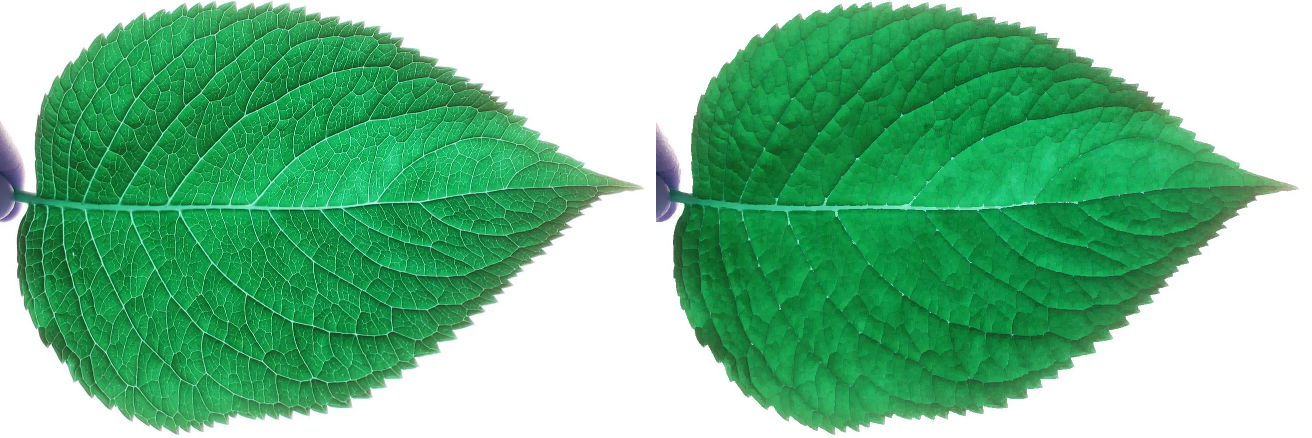

In [ ]:
import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow

def kuwahara_filter_cpu(image, omega):
    r, g, b = cv2.split(image.astype(np.float32))
    height, width = r.shape

    output_r = np.zeros_like(r)
    output_g = np.zeros_like(g)
    output_b = np.zeros_like(b)

    windows = [
        ((-omega, 0), (-omega, 0)),
        ((0, omega + 1), (-omega, 0)),
        ((-omega, 0), (0, omega + 1)),
        ((0, omega + 1), (0, omega + 1))
    ]


    for y in range(height):
        for x in range(width):
            min_variance = float('inf')
            best_mean_r = best_mean_g = best_mean_b = 0.0


            for ((dy_start, dy_end), (dx_start, dx_end)) in windows:
                r_window = r[max(0, y + dy_start):min(height, y + dy_end),
                             max(0, x + dx_start):min(width, x + dx_end)]
                g_window = g[max(0, y + dy_start):min(height, y + dy_end),
                             max(0, x + dx_start):min(width, x + dx_end)]
                b_window = b[max(0, y + dy_start):min(height, y + dy_end),
                             max(0, x + dx_start):min(width, x + dx_end)]

                mean_r, mean_g, mean_b = np.mean(r_window), np.mean(g_window), np.mean(b_window)
                variance = np.var(b_window)

                if variance < min_variance:
                    min_variance = variance
                    best_mean_r, best_mean_g, best_mean_b = mean_r, mean_g, mean_b

            output_r[y, x] = best_mean_r
            output_g[y, x] = best_mean_g
            output_b[y, x] = best_mean_b

    filtered_image = cv2.merge([output_r, output_g, output_b]).astype(np.uint8)
    return filtered_image

image_path = '/content/gdrive/MyDrive/HPC/Proj/leaf_area.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

omega = 3
start_time = time.time()
filtered_image = kuwahara_filter_cpu(image_rgb, omega)
end_time = time.time()
print(f"Time taken with omega={omega}: {end_time - start_time:.4f} seconds")

height, width = image_rgb.shape[:2]
filtered_image_resized = cv2.resize(filtered_image, (width // 2, height // 2))
image_rgb_resized = cv2.resize(image_rgb, (width // 2, height // 2))

concatenated_image = np.concatenate((image_rgb_resized, filtered_image_resized), axis=1)

cv2_imshow(concatenated_image)


In [ ]:
import time

def measure_performance(image, omega_values):
    timings = {}
    for omega in omega_values:
        start_time = time.time()

        filtered_image = kuwahara_filter_cpu(image, omega=omega)

        end_time = time.time()
        time_taken = end_time - start_time
        timings[omega] = time_taken

    return timings

omega_values = [1, 3, 5, 7, 9]

performance_timings = measure_performance(image_rgb, omega_values)

print("\nPerformance Timings for Different Omega Values:")
for omega, timing in performance_timings.items():
    print(f"Omega: {omega}, Time: {timing:.4f} seconds")


Performance Timings for Different Omega Values:
Omega: 1, Time: 338.2432 seconds
Omega: 3, Time: 334.3252 seconds
Omega: 5, Time: 340.1106 seconds
Omega: 7, Time: 335.8716 seconds
Omega: 9, Time: 339.8808 seconds
